# Churners classification

### libraries

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### dataset

In [454]:
file_url = '/Users/santiagocardenas/Documents/MDSI/202402/Statistical thinking for data science/STDS-at3/dataset_cleaned.csv'
data = pd.read_csv(file_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41175 entries, 0 to 41174
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  object 
 2   marital         41175 non-null  object 
 3   education       41175 non-null  object 
 4   default         41175 non-null  object 
 5   housing         41175 non-null  object 
 6   loan            41175 non-null  object 
 7   contact         41175 non-null  object 
 8   month           41175 non-null  object 
 9   day_of_week     41175 non-null  object 
 10  duration        41175 non-null  int64  
 11  campaign        41175 non-null  int64  
 12  pdays           41175 non-null  int64  
 13  previous        41175 non-null  int64  
 14  poutcome        41175 non-null  object 
 15  emp.var.rate    41175 non-null  float64
 16  cons.price.idx  41175 non-null  float64
 17  cons.conf.idx   41175 non-null 

In [455]:
data.columns = data.columns.str.replace('.', '_') 

/var/folders/wv/tct1f2g5605fttplsk9y_gzh0000gn/T/ipykernel_2132/1753127780.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace('.', '_')


### data cleaning

#### duplicated values

In [456]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1262,39,blue-collar,married,basic,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12255,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14228,27,technician,single,professional course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16950,47,technician,divorced,high school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18459,32,technician,single,professional course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20210,55,services,married,high school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20528,41,technician,married,professional course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25210,39,admin,married,university degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28469,24,services,single,high school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32241,49,blue-collar,married,basic,no,yes,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no


In [457]:
data.drop_duplicates(inplace=True)
data.shape

(41160, 21)

#### missing values

In [458]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

there are no missing values

### initial feature selection

#### categorical columns

In [459]:
churn_dict = {
    'no' : 0,
    'yes' : 1
}
data['y'] = data['y'].map(churn_dict)
data['y'] = data['y'].astype('int')

cat_cols = data.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    data[col] = data[col].astype('category')
data.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
y                    int64
dtype: object

In [460]:
data['education'] = data['education'].cat.reorder_categories(
    new_categories = ['unknown', 'illiterate', 'basic', 'high school', 'professional course', 'university degree'],
    ordered = True
)
data.education.unique()

['basic', 'high school', 'professional course', 'unknown', 'university degree', 'illiterate']
Categories (6, object): ['unknown' < 'illiterate' < 'basic' < 'high school' < 'professional course' < 'university degree']

In [461]:
data['month'] = data['month'].cat.reorder_categories(
    new_categories = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    ordered = True
)
data.month.unique()

['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
Categories (10, object): ['mar' < 'apr' < 'may' < 'jun' ... 'sep' < 'oct' < 'nov' < 'dec']

In [462]:
data['day_of_week'] = data['day_of_week'].cat.reorder_categories(
    new_categories = ['mon', 'tue', 'wed', 'thu', 'fri'],
    ordered = True
)
data.day_of_week.unique()

['mon', 'tue', 'wed', 'thu', 'fri']
Categories (5, object): ['mon' < 'tue' < 'wed' < 'thu' < 'fri']

In [463]:
from scipy.stats import chi2_contingency
def statistical_test_categorical(df, target, column):
    _, p_value, _, _ = chi2_contingency(pd.crosstab(df[target], df[column]))
    return p_value
    
relevant_cat_cols = []
for col in cat_cols:
    p_value = statistical_test_categorical(data, 'y', col)
    if p_value < 0.05:
        relevant_cat_cols.append(col)

print(relevant_cat_cols)
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


only 'loan' does not display influence on churn according to the test

#### numerical cols

In [464]:
data_dict = pd.read_excel('/Users/santiagocardenas/Documents/MDSI/202402/Statistical thinking for data science/STDS-at3/Data_dictionary-2.xlsx')
data_dict.index = data_dict['Variable Name']
data_dict.drop(columns='Variable Name')
data_dict.loc['duration'][1]

'Last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.'

since duration feature is know after the call is performed, this feature cannot possible allow to differenciate a successfull customer approach

In [465]:
num_cols = data.select_dtypes(include='number').columns.tolist()
num_cols.remove('y')
num_cols.remove('duration')

from scipy.stats import mannwhitneyu
def statistical_test_numerical(df, target, column):
    _, p_value = mannwhitneyu(df[df[target] == 0][column], df[df[target] == 1][column])
    return p_value

rel_num_cols = []
for col in num_cols:
    p_value = statistical_test_numerical(data, 'y', col)
    if p_value < 0.05:
        rel_num_cols.append(col)

print(rel_num_cols)
print(num_cols)

['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


all of the numerical features display a statistical difference between the two targe populations

#### correlation analysis

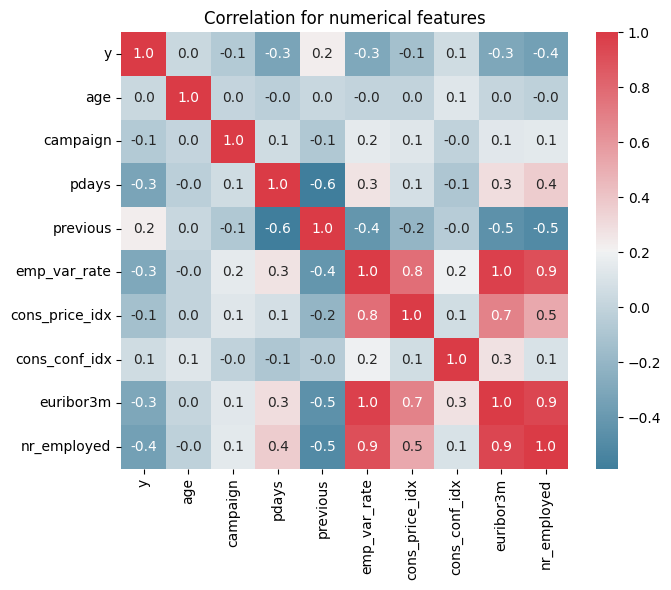

In [466]:
cols_to_plot = ['y'] + rel_num_cols
fig, axis = plt.subplots(1, 1, figsize=(7, 6))
sns.despine(fig)
sns.heatmap(data[cols_to_plot].corr(), cmap = sns.diverging_palette(230, 10, n=1001), ax = axis, annot=True, fmt = '.1f')
axis.set_title('Correlation for numerical features')
plt.tight_layout()

In [467]:
correlations = data[cols_to_plot].corr()
filtered_corr = correlations[abs(correlations) > 0.50]
filtered_corr = filtered_corr.where(~np.eye(filtered_corr.shape[0], dtype=bool))
filtered_corr_pairs = filtered_corr.stack().reset_index()
filtered_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
filtered_corr_pairs.sort_values(by = 'Correlation', ascending = False, inplace=True)
filtered_corr_pairs

,Feature 1,Feature 2,Correlation
4,emp_var_rate,euribor3m,0.972260
9,euribor3m,emp_var_rate,0.972260
11,euribor3m,nr_employed,0.945211
15,nr_employed,euribor3m,0.945211
5,emp_var_rate,nr_employed,0.907111
13,nr_employed,emp_var_rate,0.907111
3,emp_var_rate,cons_price_idx,0.775586
6,cons_price_idx,emp_var_rate,0.775586
7,cons_price_idx,euribor3m,0.688627
10,euribor3m,cons_price_idx,0.688627


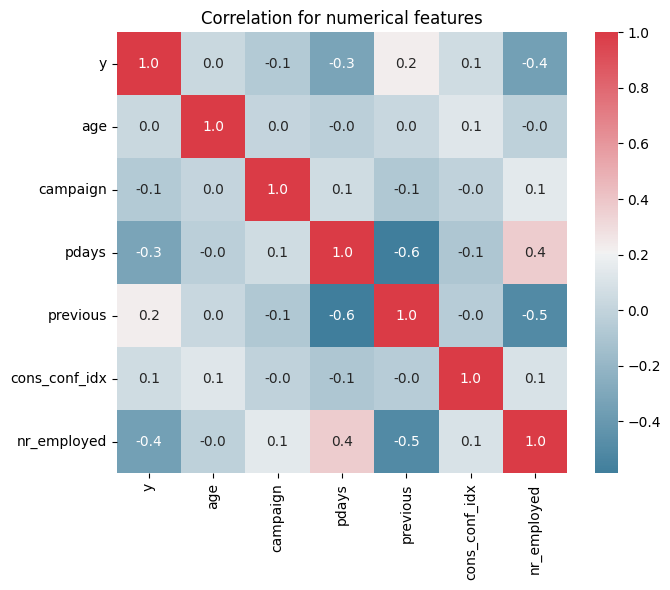

In [468]:
cols_to_plot.remove('euribor3m')
cols_to_plot.remove('emp_var_rate')
cols_to_plot.remove('cons_price_idx')

fig, axis = plt.subplots(1, 1, figsize=(7, 6))
sns.despine(fig)
sns.heatmap(data[cols_to_plot].corr(), cmap = sns.diverging_palette(230, 10, n=1001), ax = axis, annot=True, fmt = '.1f')
axis.set_title('Correlation for numerical features')
plt.tight_layout()

#### variance analysis

<Axes: >

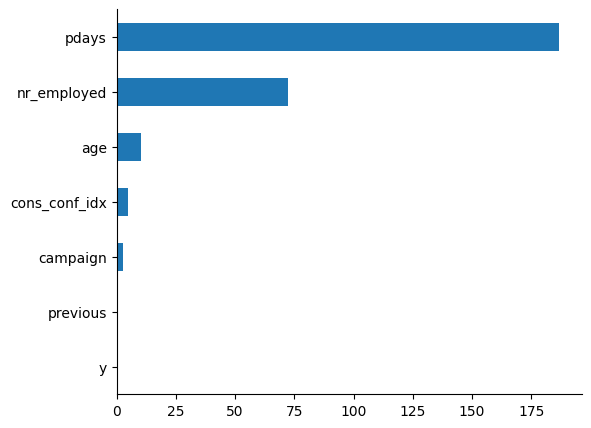

In [469]:
variance = np.std(data[cols_to_plot]).sort_values()
fig, axis = plt.subplots(figsize = (6, 5))
sns.despine(fig)
variance.plot(kind = 'barh', ax = axis)


considering that previous and pdays have a correlation higher than 0.6 and the variance of previous is lower compared to <br>
previous feature, the latter is preferred

In [470]:
cols_to_plot.remove('previous')

### data preparation

In [471]:
df_cleaned = data[cols_to_plot + relevant_cat_cols].copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41160 entries, 0 to 41174
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   y              41160 non-null  int64   
 1   age            41160 non-null  int64   
 2   campaign       41160 non-null  int64   
 3   pdays          41160 non-null  int64   
 4   cons_conf_idx  41160 non-null  float64 
 5   nr_employed    41160 non-null  float64 
 6   job            41160 non-null  category
 7   marital        41160 non-null  category
 8   education      41160 non-null  category
 9   default        41160 non-null  category
 10  housing        41160 non-null  category
 11  contact        41160 non-null  category
 12  month          41160 non-null  category
 13  day_of_week    41160 non-null  category
 14  poutcome       41160 non-null  category
dtypes: category(9), float64(2), int64(4)
memory usage: 2.6 MB


#### data scaling

In [472]:
num_cols = df_cleaned.select_dtypes('number').columns.tolist()
num_cols.remove('y')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cleaned[num_cols])
df_cleaned[num_cols] = scaler.transform(df_cleaned[num_cols])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41160 entries, 0 to 41174
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   y              41160 non-null  int64   
 1   age            41160 non-null  float64 
 2   campaign       41160 non-null  float64 
 3   pdays          41160 non-null  float64 
 4   cons_conf_idx  41160 non-null  float64 
 5   nr_employed    41160 non-null  float64 
 6   job            41160 non-null  category
 7   marital        41160 non-null  category
 8   education      41160 non-null  category
 9   default        41160 non-null  category
 10  housing        41160 non-null  category
 11  contact        41160 non-null  category
 12  month          41160 non-null  category
 13  day_of_week    41160 non-null  category
 14  poutcome       41160 non-null  category
dtypes: category(9), float64(5), int64(1)
memory usage: 2.6 MB


#### feature encoding

In [473]:
# categorical columns
cat_cols = df_cleaned.select_dtypes('category').columns.to_list()
# ordinal columns subset
ordinal_cols = ['education', 'month', 'day_of_week']
# orders of each ordinal feature
education_order = ['unknown', 'illiterate', 'basic', 'high school', 'professional course', 'university degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
dow_order = ['mon', 'tue', 'wed', 'thu', 'fri']
# nominal features
nominal_cols = [col for col in cat_cols if col not in ordinal_cols]

# encoding ordinal features
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [education_order, month_order, dow_order], dtype = 'int64')
ord_enc.fit(df_cleaned[ordinal_cols])
df_cleaned[ordinal_cols] = ord_enc.transform(df_cleaned[ordinal_cols])

# encoding nominal features
from sklearn.preprocessing import OneHotEncoder
nom_enc = OneHotEncoder(drop = 'first', dtype = 'int64', sparse_output = False)
nom_enc.fit(df_cleaned[nominal_cols])
nominal_df = pd.DataFrame(nom_enc.transform(df_cleaned[nominal_cols]), 
                          columns = nom_enc.get_feature_names_out(nominal_cols),
                          index = df_cleaned.index)

df_cleaned.drop(columns = nominal_cols, inplace = True)
df_cleaned = pd.concat([df_cleaned, nominal_df], axis = 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41160 entries, 0 to 41174
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   y                     41160 non-null  int64  
 1   age                   41160 non-null  float64
 2   campaign              41160 non-null  float64
 3   pdays                 41160 non-null  float64
 4   cons_conf_idx         41160 non-null  float64
 5   nr_employed           41160 non-null  float64
 6   education             41160 non-null  int64  
 7   month                 41160 non-null  int64  
 8   day_of_week           41160 non-null  int64  
 9   job_blue-collar       41160 non-null  int64  
 10  job_entrepreneur      41160 non-null  int64  
 11  job_housemaid         41160 non-null  int64  
 12  job_management        41160 non-null  int64  
 13  job_retired           41160 non-null  int64  
 14  job_self-employed     41160 non-null  int64  
 15  job_services       

#### data spliting

In [474]:
from sklearn.model_selection import train_test_split
y = df_cleaned.pop('y')
x = df_cleaned
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 1)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(28812, 28) (12348, 28)
(28812,) (12348,)


### model experiments and performance

#### parametric model: **logistic regression**

In [475]:
import statsmodels.api as sm
lr = sm.Logit(y_train, x_train).fit(maxiter=200, method='bfgs')
lr.summary()

Optimization terminated successfully.
         Current function value: 0.292084
         Iterations: 163
         Function evaluations: 166
         Gradient evaluations: 166


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28812
Model:                          Logit   Df Residuals:                    28784
Method:                           MLE   Df Model:                           27
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                  0.1703
Time:                        13:53:33   Log-Likelihood:                -8415.5
converged:                       True   LL-Null:                       -10143.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0451      0.025     -1.785      0.074      -0.095       0.004
campaign                -0.1227      0.030     -4.126      0.000      -0.181      -0.064
pdays                   -0.1531      0.043     -3.579      0.000      -0.237      -0.069
cons_conf_idx            0.2397      0.019     12.364      0.000       0.202       0.278
nr_employed             -0.6250      0.021    -29.324      0.000      -0.667      -0.583
education               -0.1862      0.014    -13.017      0.000      -0.214      -0.158
month                   -0.1000      0.010     -9.618      0.000      -0.120      -0.080
day_of_week             -0.0356      0.014     -2.559      0.010      -0.063      -0.008
job_blue-collar         -0.8411      0.065    -12.884      0.000      -0.969      -0.713
job_entrepreneur        -0.5766      0.127     -4.535      0.000      -0.826      -0.327
job_housemaid           -0.5408      0.142     -3.807      0.000      -0.819      -0.262
job_management          -0.2640      0.086     -3.086      0.002      -0.432      -0.096
job_retired             -0.1238      0.106     -1.168      0.243      -0.331       0.084
job_self-employed       -0.3070      0.119     -2.579      0.010      -0.540      -0.074
job_services            -0.7669      0.081     -9.441      0.000      -0.926      -0.608
job_student             -0.2410      0.116     -2.074      0.038      -0.469      -0.013
job_technician          -0.3320      0.062     -5.395      0.000      -0.453      -0.211
job_unemployed          -0.3038      0.129     -2.353      0.019      -0.557      -0.051
job_unknown             -0.8604      0.250     -3.443      0.001      -1.350      -0.371
marital_married         -0.5784      0.056    -10.320      0.000      -0.688      -0.469
marital_single          -0.5360      0.067     -8.037      0.000      -0.667      -0.405
marital_unknown         -0.9288      0.477     -1.949      0.051      -1.863       0.005
default_unknown         -0.4249      0.067     -6.385      0.000      -0.555      -0.294
default_yes             -0.0514      2.771     -0.019      0.985      -5.482       5.380
housing_yes             -0.1684      0.040     -4.181      0.000      -0.247      -0.089
contact_telephone       -0.8850      0.056    -15.937      0.000      -0.994      -0.776
poutcome_nonexistent    -0.0135      0.054     -0.247      0.805      -0.120       0.093
poutcome_success         0.7265      0.232      3.133      0.002       0.272       1.181
========================================================================================
"""

the p values from the coeficients suggest that feautures such as age, retirees, unknown marital status, postive defeault status, and non-existent <br>
previous outcome are statistically cero with a confidence level of 95% 

In [476]:
def train_and_val_conf_matrix(y_train, y_val, train_pred, val_pred):
    from sklearn.metrics import ConfusionMatrixDisplay
    fig, axis = plt.subplots(1, 2, figsize = (10, 5))
    ConfusionMatrixDisplay.from_predictions(y_true = y_train, y_pred = train_pred, normalize = 'true', cmap='Greens', ax = axis[0])
    ConfusionMatrixDisplay.from_predictions(y_true = y_val, y_pred = val_pred, normalize = 'true', cmap='Greens', ax = axis[1])
    axis[0].set_title('training performance')
    axis[1].set_title('validation performance')
    return fig, axis

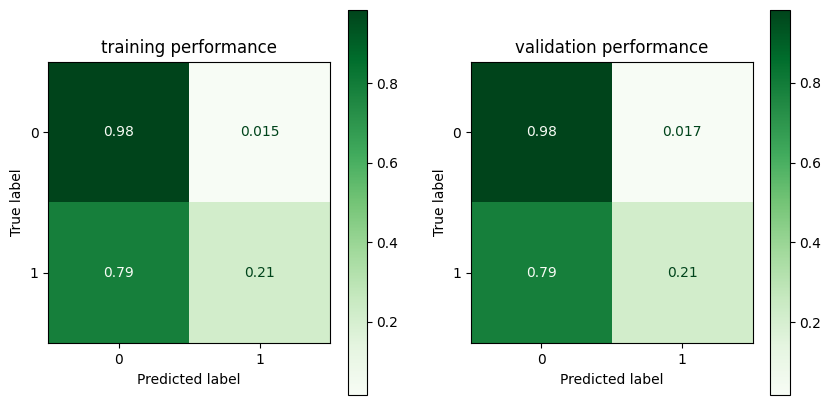

In [477]:
from sklearn.metrics import ConfusionMatrixDisplay
threshold = 0.5
train_pred = lr.predict(x_train)
train_pred = (train_pred > threshold).astype('int64')
val_pred = lr.predict(x_val)
val_pred = (val_pred > threshold).astype('int64')
fig, axis = train_and_val_conf_matrix(y_train, y_val, train_pred, val_pred)


In [478]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

def fpr_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    tn, fp, _, _ = cm.ravel()
    tnr = tn / (tn + fp)
    return 1 - tnr

def metrics_comparison_summary(y_val, val_pred, y_train, train_pred):
    results_df = pd.DataFrame()
    results_df['f1_score'] = [f1_score(y_train, train_pred), f1_score(y_val, val_pred)]
    results_df['recall'] = [recall_score(y_train, train_pred), recall_score(y_val, val_pred)]
    results_df['precision'] = [precision_score(y_train, train_pred), precision_score(y_val, val_pred)]
    results_df['fpr'] = [fpr_score(y_train, train_pred, neg_label = 0, pos_label = 1), fpr_score(y_val, val_pred, neg_label = 0, pos_label = 1)]
    results_df.index = ['training', 'validation']
    return results_df

metrics_comparison_summary(y_val, val_pred, y_train, train_pred)

,f1_score,recall,precision,fpr
training,0.320166,0.213494,0.639889,0.015255
validation,0.318594,0.214953,0.615226,0.017067


since the parametric model displays a consistent performance over training and unseen data it is worht exploring <br>
how the decision threshold for the positive label on the predictions might improve model performance on both <br>
recall and precision, which are the interest variables on this problem

Text(0.5, 1.0, 'precision-recall curve')

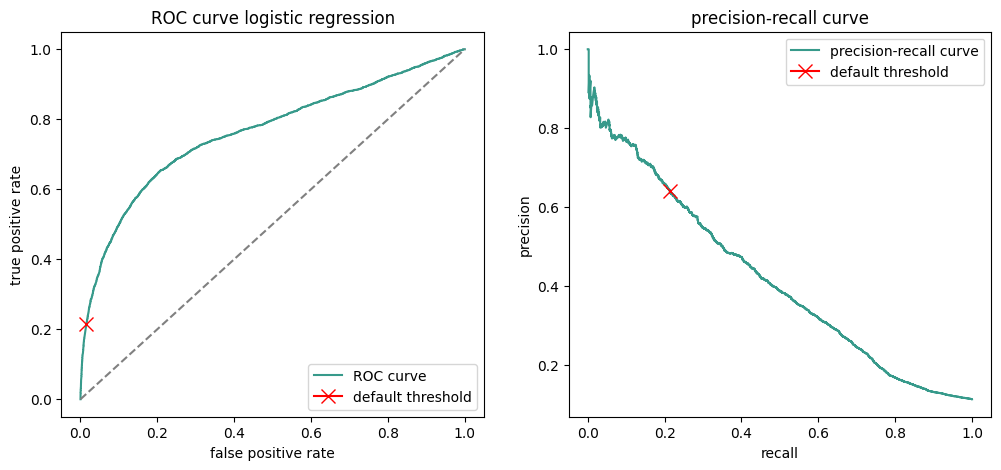

In [479]:
from sklearn.metrics import roc_curve, precision_recall_curve

train_prob = lr.predict(x_train)
fpr, tpr, threshold = roc_curve(y_train, train_prob) # roc curve results
precision, recall, _ = precision_recall_curve(y_train, train_prob, pos_label = 1)

fig, axis = plt.subplots(1, 2, figsize = (12, 5))
axis[0].plot(fpr, tpr, color = '#379A8B', label = 'ROC curve') # roc curve
axis[0].plot([0, 1], [0, 1], color = 'grey', linestyle = '--') # diagonal line
axis[0].plot(fpr_score(y_train, train_pred, neg_label = 0, pos_label = 1), 
          recall_score(y_train, train_pred), 
          marker = 'x', 
          markersize = 10, 
          color = 'red', 
          label = 'default threshold') # marker for certain prediction

axis[0].set_ylabel('true positive rate') # same as recall score
axis[0].set_xlabel('false positive rate')
axis[0].legend(loc = 'lower right')
axis[0].set_title('ROC curve logistic regression')

axis[1].plot(recall, precision, color = '#379A8B', label = 'precision-recall curve')
axis[1].plot(recall_score(y_train, train_pred),
          precision_score(y_train, train_pred),
          marker = 'x', 
          markersize = 10, 
          color = 'red', 
          label = 'default threshold')

axis[1].set_ylabel('precision')
axis[1].set_xlabel('recall')
axis[1].legend(loc = 'best')
axis[1].set_title('precision-recall curve')

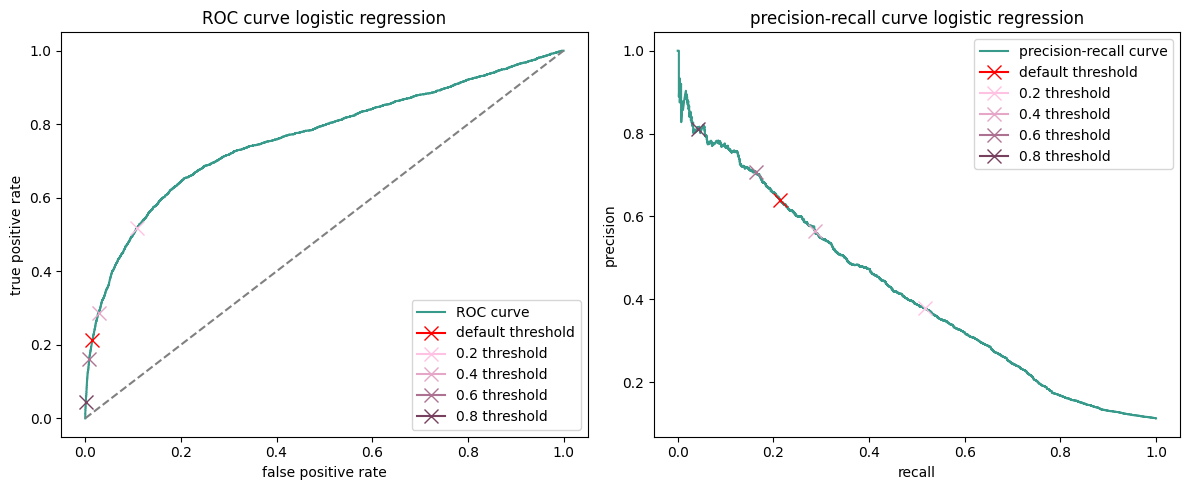

In [535]:
thresholds = np.arange(0.2, 1, 0.2).tolist()
train_prob = lr.predict(x_train)
pred_in_thresholds = {k: 0 for k in thresholds}

for t in range(len(pred_in_thresholds.keys())):
    temp_pred = (train_prob > thresholds[t]).astype('int64')
    pred_in_thresholds[thresholds[t]] = temp_pred
    
pred_in_thresholds = pd.DataFrame(pred_in_thresholds)


fpr, tpr, threshold = roc_curve(y_train, train_prob) # roc curve results
precision, recall, _ = precision_recall_curve(y_train, train_prob, pos_label = 1)

fig, axis = plt.subplots(1, 2, figsize = (12, 5))
axis[0].plot(fpr, tpr, color = '#379A8B', label = 'ROC curve') # roc curve
axis[0].plot([0, 1], [0, 1], color = 'grey', linestyle = '--') # diagonal line
axis[0].plot(fpr_score(y_train, train_pred, neg_label = 0, pos_label = 1), 
          recall_score(y_train, train_pred), 
          marker = 'x', 
          markersize = 10, 
          color = 'red', 
          label = 'default threshold') # marker for certain prediction

axis[0].set_ylabel('true positive rate') # same as recall score
axis[0].set_xlabel('false positive rate')
axis[0].set_title('ROC curve logistic regression')

axis[1].plot(recall, precision, color = '#379A8B', label = 'precision-recall curve')
axis[1].plot(recall_score(y_train, train_pred),
          precision_score(y_train, train_pred),
          marker = 'x', 
          markersize = 10, 
          color = 'red', 
          label = 'default threshold')

colors = ['#FFC2E3', '#E6A6C7', '#AD7291', '#78405F']
for i, t in enumerate(pred_in_thresholds.columns):
    axis[0].plot(
        fpr_score(y_train, pred_in_thresholds[t], neg_label = 0, pos_label = 1), 
        recall_score(y_train, pred_in_thresholds[t]), 
        marker = 'x', 
        markersize = 10, 
        color = colors[i], 
        label = str(round(t,1)) + ' threshold'
    )
    axis[1].plot(
        recall_score(y_train, pred_in_thresholds[t]),
        precision_score(y_train, pred_in_thresholds[t]),
        marker = 'x', 
        markersize = 10, 
        color = colors[i], 
        label = str(round(t,1)) + ' threshold'
    )
axis[0].legend()
axis[1].legend()
axis[1].set_ylabel('precision')
axis[1].set_xlabel('recall')
axis[1].set_title('precision-recall curve logistic regression')
plt.tight_layout()
fig.savefig('lr_curves.jpg', dpi = 300)

the graph shows that increasing the threshold for positive label prediction decreases the both tpr (recall) and fpr <br>
and that increases in recall comes at the expense of precision. Since a relevant metric is recall, higher and consistent values <br>
are desirable in this business context

In [539]:
new_threshold = 0.225
train_pred_nt = (lr.predict(x_train) > new_threshold).astype('int64')
val_pred_nt = (lr.predict(x_val) > new_threshold).astype('int64')
metrics_comparison_summary(y_val, val_pred_nt, y_train, train_pred_nt)

,f1_score,recall,precision,fpr
training,0.437323,0.475046,0.405150,0.088555
validation,0.451966,0.503954,0.409702,0.092179


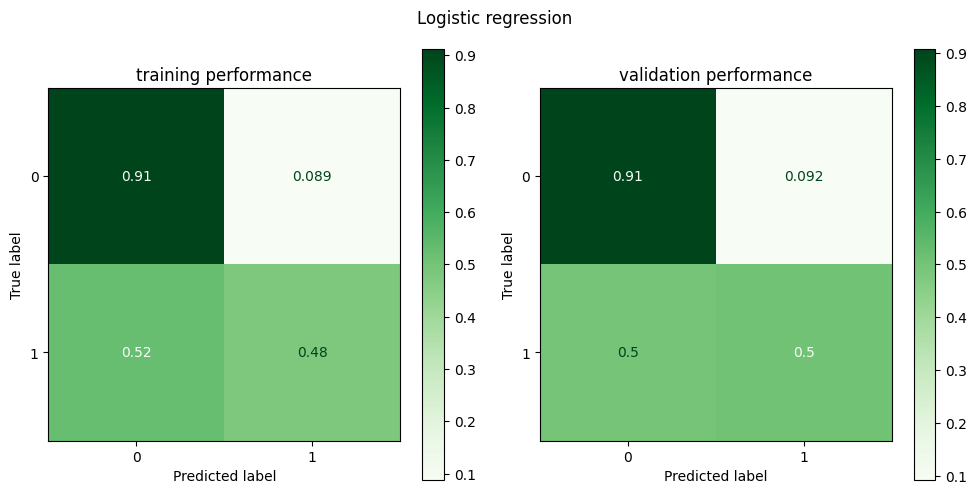

In [540]:
fig, axis = train_and_val_conf_matrix(y_train, y_val, train_pred_nt, val_pred_nt)
plt.suptitle('Logistic regression')
plt.tight_layout()
fig.savefig('confusion_matrix_lr.jpg', dpi = 300)

#### non-parametric model: **extra trees**

            f1_score    recall  precision       fpr
training    0.956112  1.000000   0.915914  0.011656
validation  0.363560  0.311287   0.436932  0.050926


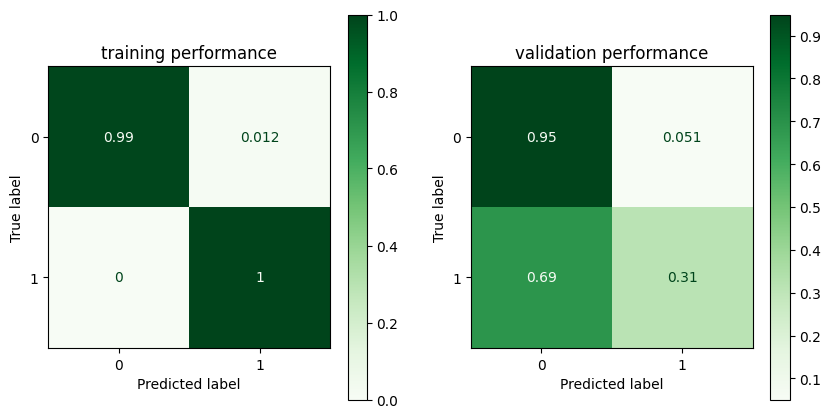

In [483]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced_subsample').fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))


**manual parameter tunning**
##### parameter: class_weight

            f1_score    recall  precision       fpr
training    0.956112  1.000000   0.915914  0.011656
validation  0.363560  0.311287   0.436932  0.050926


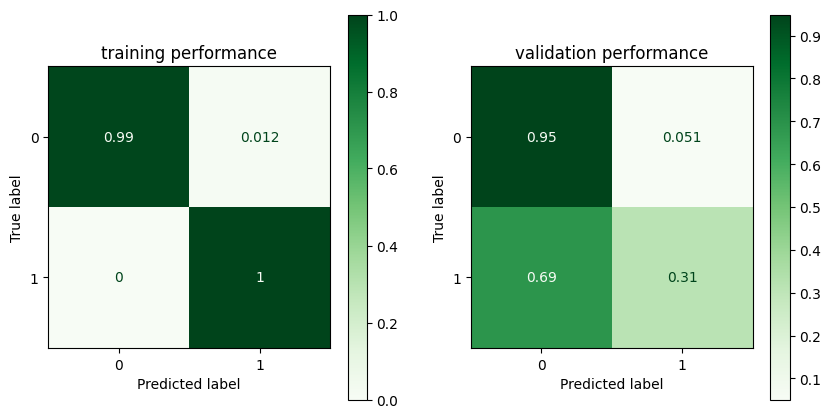

In [484]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced_subsample').fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.956112  1.000000   0.915914  0.011656
validation  0.363560  0.311287   0.436932  0.050926


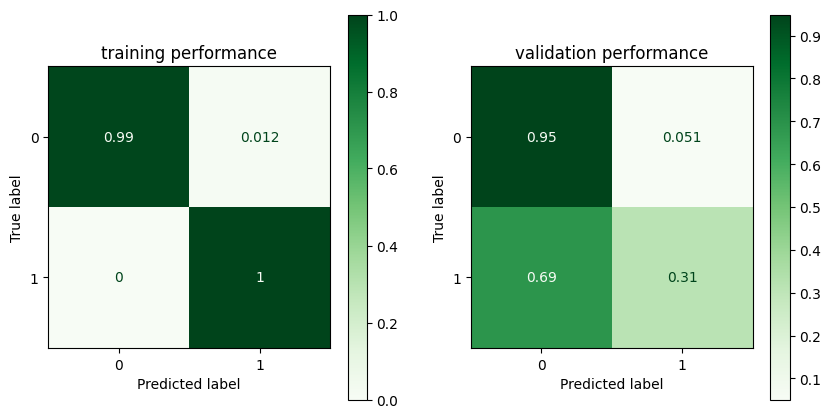

In [485]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced').fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

balanced and balanced subsamples display the same performance

            f1_score    recall  precision       fpr
training     0.50231  0.686691   0.395985  0.132989
validation   0.46498  0.627606   0.369289  0.136077


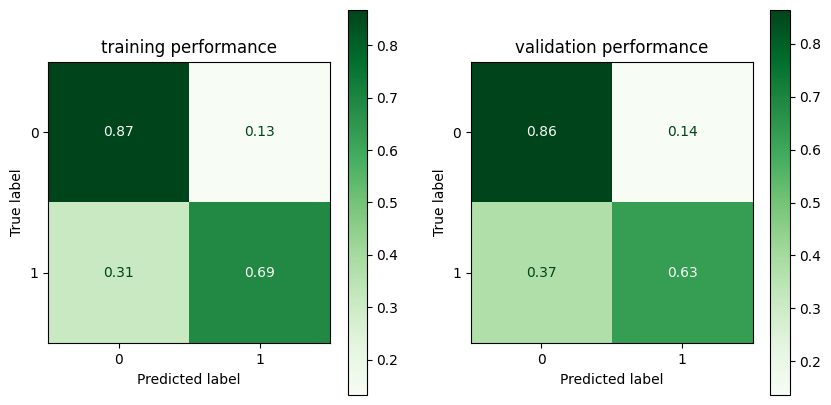

In [486]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 10).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.562401  0.764941   0.444663  0.121294
validation  0.467820  0.621855   0.374946  0.131605


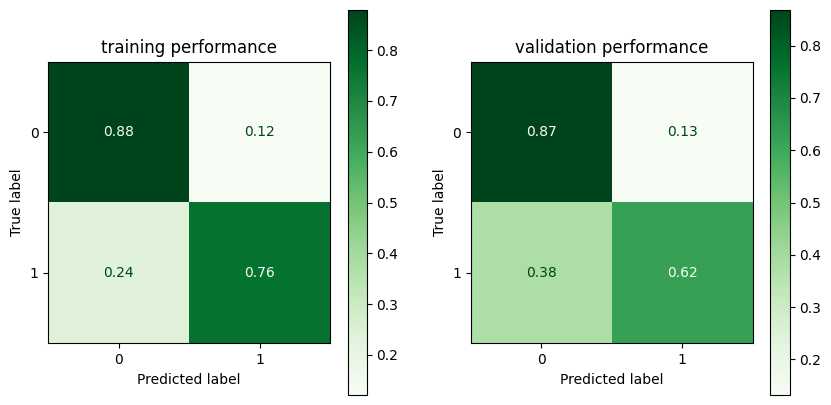

In [487]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 5).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

min sample leafs of 10 displays a more consistent performance than that of 5

            f1_score    recall  precision       fpr
training     0.50231  0.686691   0.395985  0.132989
validation   0.46498  0.627606   0.369289  0.136077


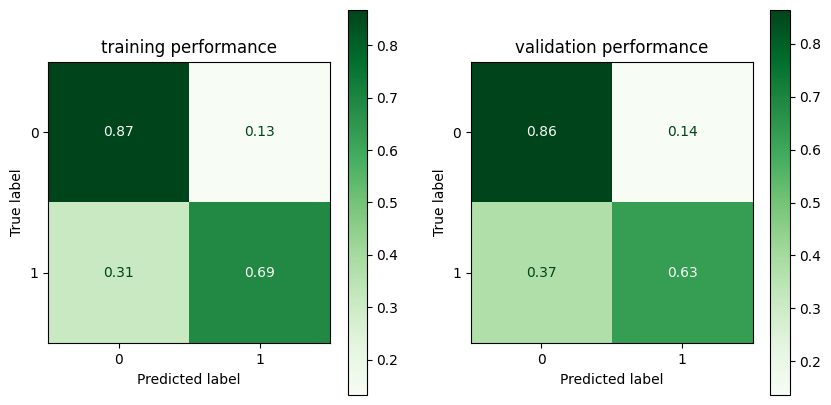

In [488]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 10).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.482971  0.674985   0.376008  0.142220
validation  0.458387  0.635514   0.358475  0.144383


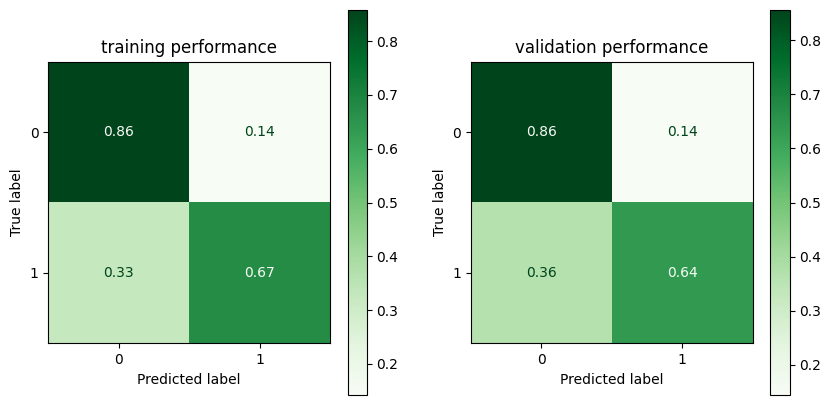

In [489]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 15).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

the min sample leaf parameter that seems to make the most consistent performance is likely to lie between 10 and 15 <br>
now looking at the hyperparameter max depth

In [490]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          ).fit(x_train, y_train)

print(np.mean([tree.get_depth() for tree in et.estimators_]))

25.93


            f1_score    recall  precision       fpr
training    0.492072  0.683611   0.384376  0.139013
validation  0.457813  0.631919   0.358922  0.143287


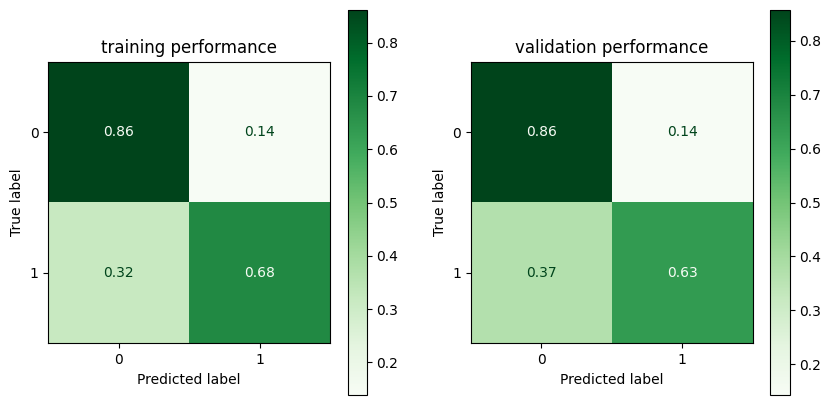

In [491]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 25).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.475202  0.670055   0.368145  0.146014
validation  0.455059  0.636952   0.353975  0.147577


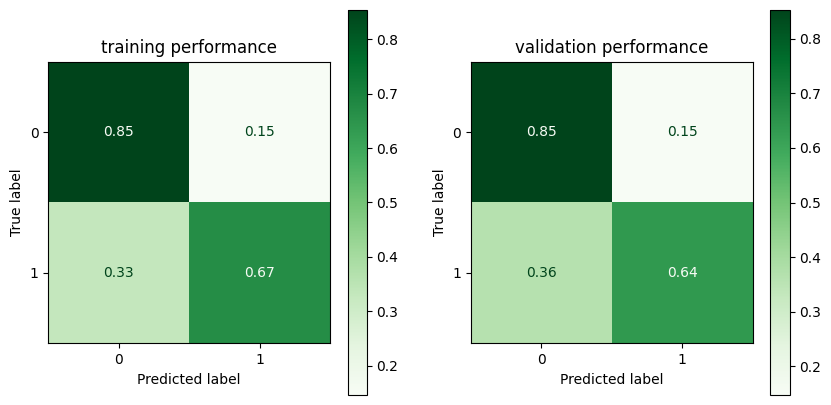

In [492]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.450341  0.661429   0.341390  0.162012
validation  0.445155  0.650611   0.338318  0.161541


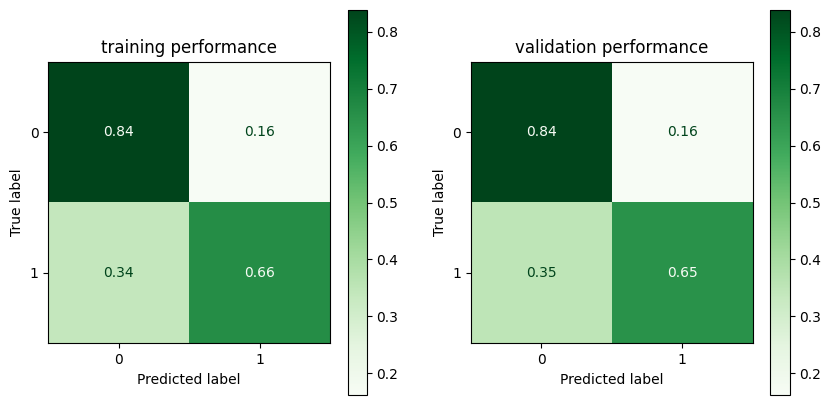

In [493]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 10).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

max depth of 15 is higher and more consistent than that of 10, now lets look at <br>
max features parameter

            f1_score    recall  precision       fpr
training    0.518347  0.722428   0.404171  0.135219
validation  0.454759  0.626887   0.356792  0.143470


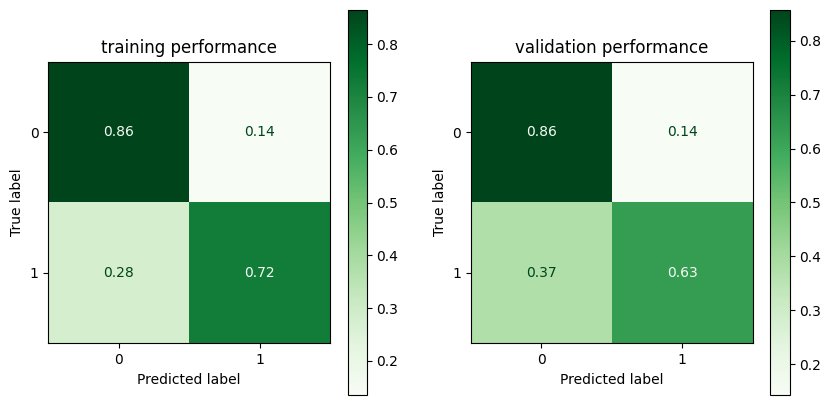

In [508]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.9).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.437865  0.658349   0.328012  0.171243
validation  0.428299  0.646298   0.320271  0.174135


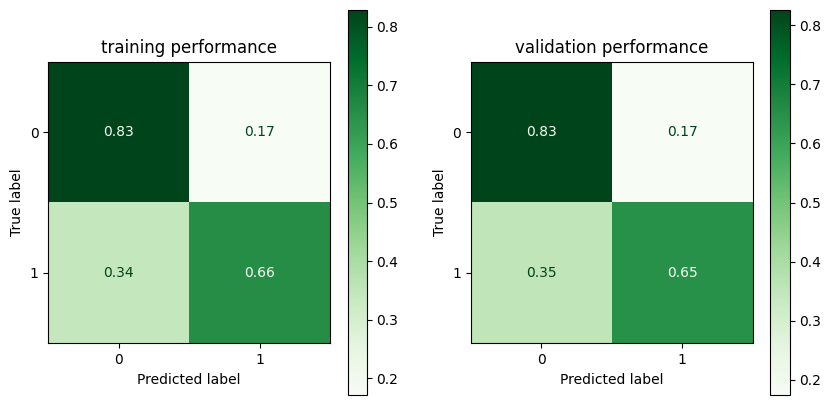

In [509]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.1).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.475202  0.670055   0.368145  0.146014
validation  0.455059  0.636952   0.353975  0.147577


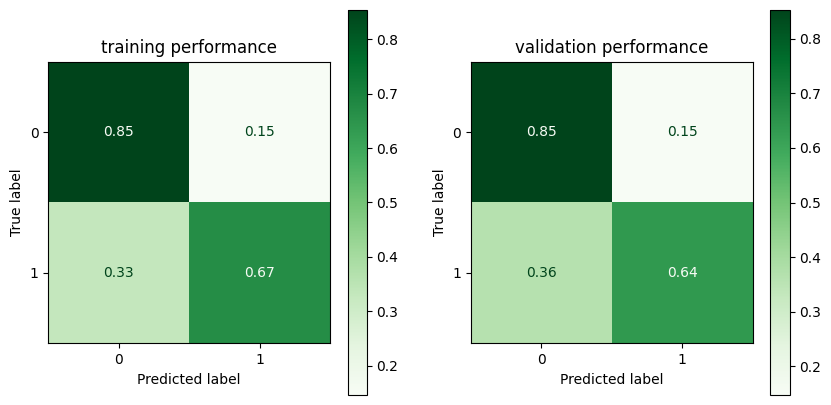

In [511]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.2).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.491650  0.680222   0.384937  0.137996
validation  0.459136  0.634076   0.359853  0.143196


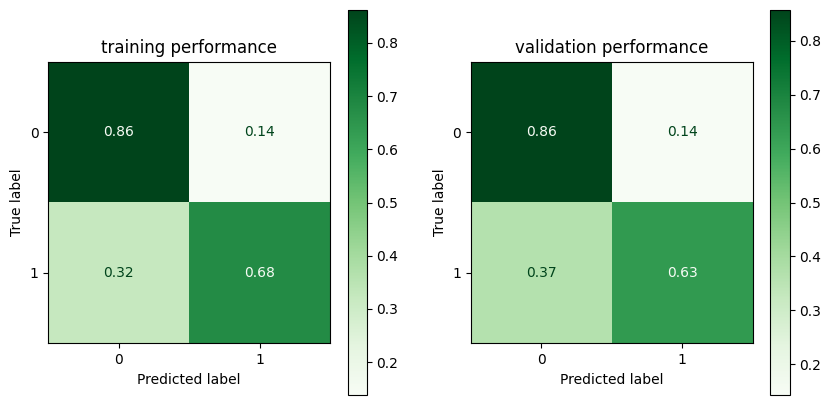

In [512]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.3).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

max features seems to be between 0.1 and 0.2, considering that both display similar consistency but lower features display lower performance<br>
now look at the number of trees

            f1_score    recall  precision       fpr
training    0.458651  0.666359   0.349661  0.157357
validation  0.444223  0.641265   0.339810  0.158164


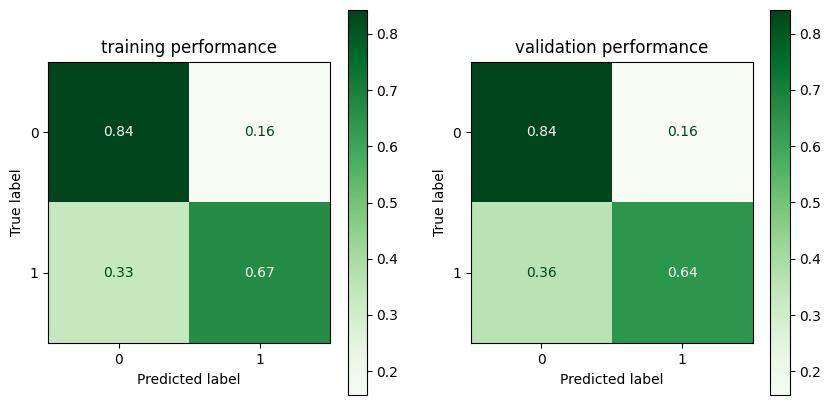

In [513]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.15,
                          n_estimators = 50).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.460066  0.666359   0.351307  0.156223
validation  0.445611  0.640546   0.341641  0.156703


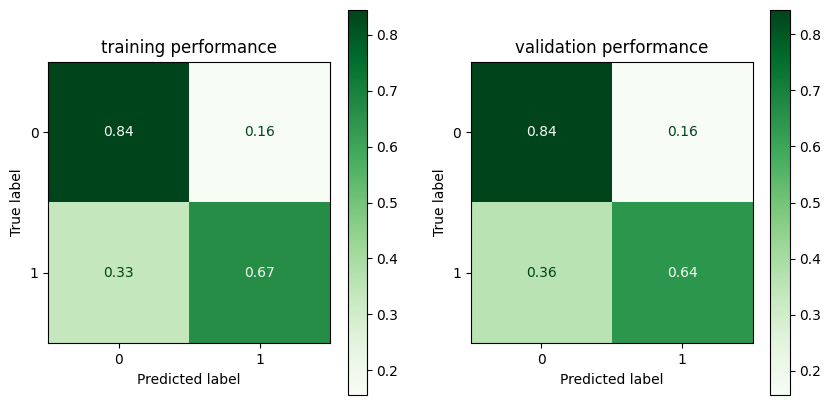

In [514]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.15,
                          n_estimators = 80).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.459344  0.664818   0.350894  0.156145
validation  0.446223  0.641265   0.342156  0.156521


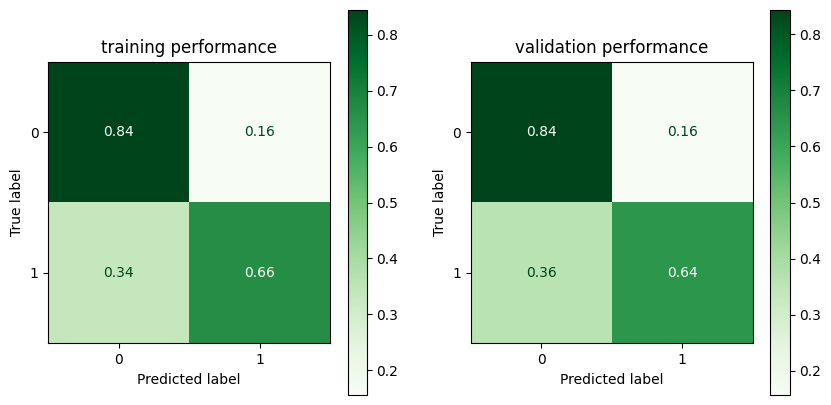

In [515]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.15,
                          n_estimators = 65).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

the number of estimators seems to be between 50 and 65, now explore more about the relative class weight

            f1_score    recall  precision       fpr
training    0.459344  0.664818   0.350894  0.156145
validation  0.446223  0.641265   0.342156  0.156521


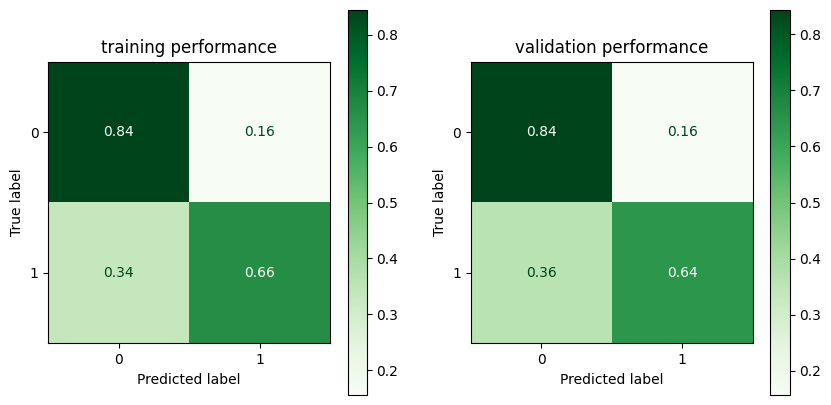

In [519]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight='balanced',
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.15,
                          n_estimators = 65).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.498154  0.498768   0.497541  0.063952
validation  0.490028  0.494608   0.485533  0.066533


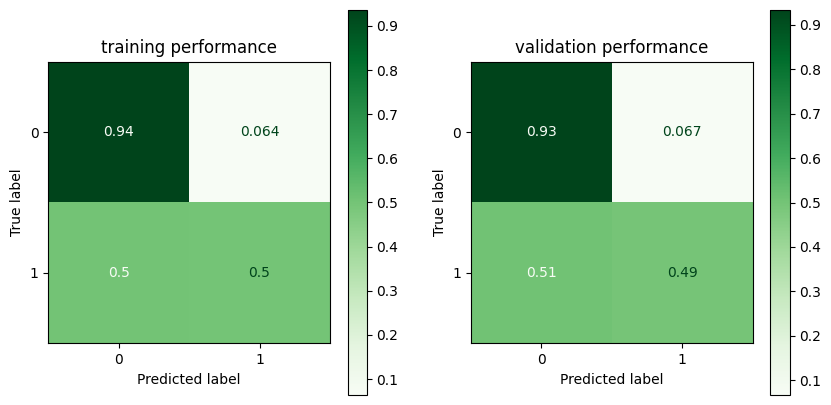

In [520]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight={0:1, 1:3},
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.15,
                          n_estimators = 65).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.501451  0.585644   0.438423  0.095244
validation  0.497690  0.580877   0.435345  0.095647


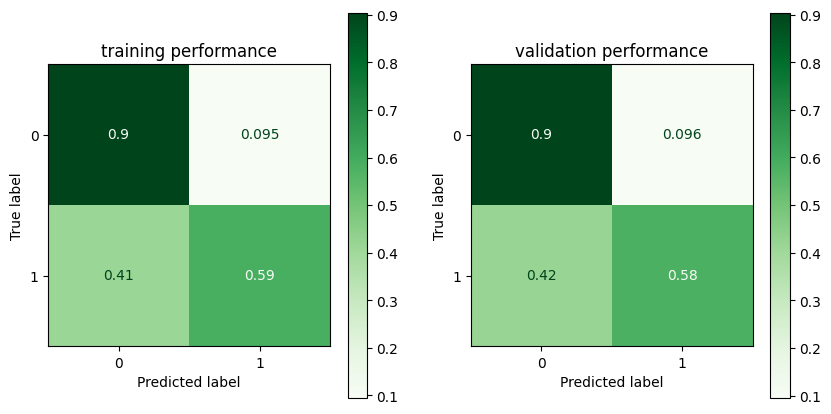

In [521]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight={0:1, 1:5},
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.15,
                          n_estimators = 65).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.476363  0.648799   0.376340  0.136509
validation  0.465375  0.630482   0.368797  0.136990


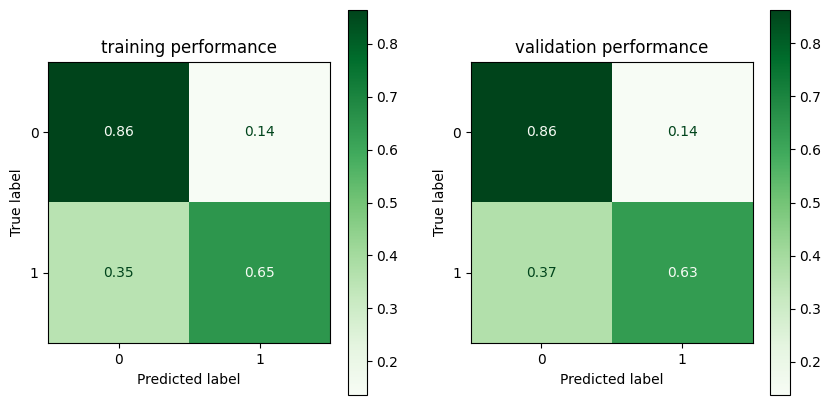

In [522]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight={0:1, 1:7},
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.15,
                          n_estimators = 65).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

            f1_score    recall  precision       fpr
training    0.497819  0.544978   0.458171  0.081827
validation  0.493972  0.544932   0.451728  0.083965


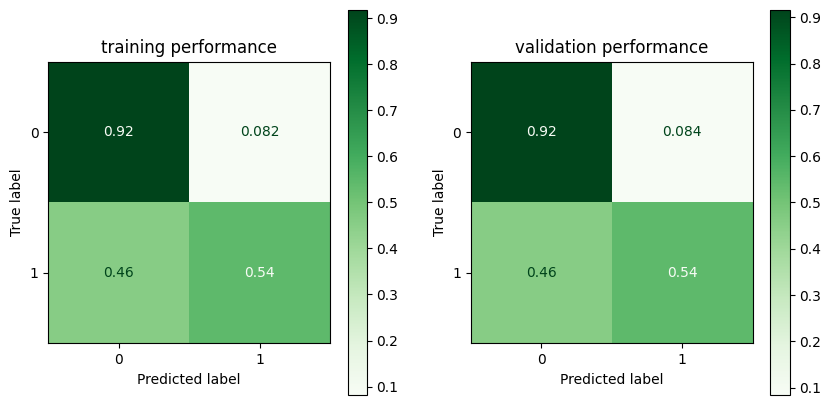

In [525]:
et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight={0:1, 1:4},
                          min_samples_leaf = 12,
                          max_depth = 15, 
                          max_features = 0.15,
                          n_estimators = 65).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))

When the weight of the positive label is four times higher than that of the negative label the results are the most consistent the f1 score displays <br>
the highest value

In [527]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
folds = StratifiedKFold(n_splits = 3, random_state = 1, shuffle = True)

grid = {
        'min_samples_leaf' : np.arange(8, 16, 2), # 12,
        'max_depth' : np.arange(12, 20,3), # 15, 
        'max_features' : np.arange(0.1, 0.3, 0.05), # 0.15,
        'n_estimators' : np.arange(50, 75, 5) #65
        }

model = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight = {0:1, 1:4})
et = GridSearchCV(estimator = model, param_grid = grid, cv = folds, n_jobs=-1, scoring = 'f1').fit(x_train, y_train)
print(et.best_params_)

{'max_depth': 15, 'max_features': 0.25000000000000006, 'min_samples_leaf': 12, 'n_estimators': 50}


            f1_score    recall  precision       fpr
training    0.511229  0.578558   0.457937  0.086951
validation  0.507717  0.579439   0.451794  0.089258


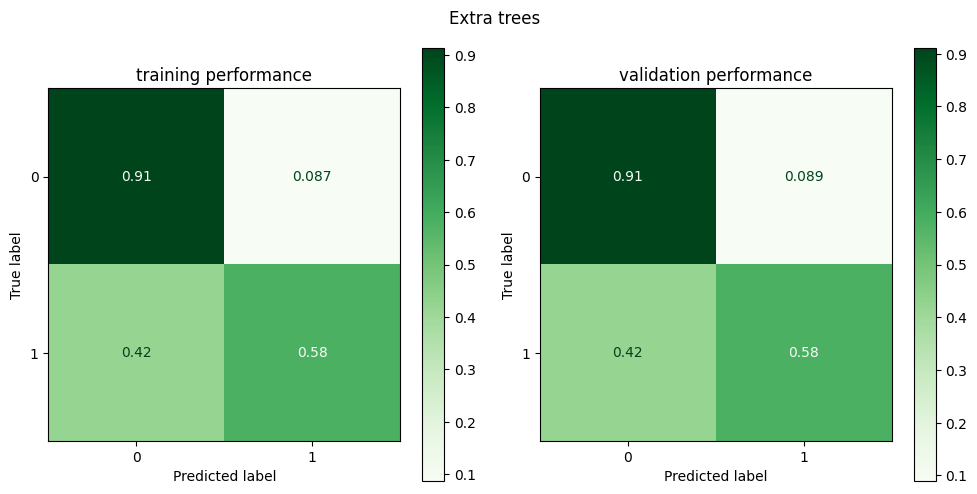

In [547]:
best_et = ExtraTreesClassifier(random_state = 0,
                          n_jobs = -1,
                          class_weight = {0:1, 1:4},
                          max_depth = 15, 
                          max_features = 0.25, 
                          min_samples_leaf = 12, 
                          n_estimators = 50).fit(x_train, y_train)
print(metrics_comparison_summary(y_train = y_train, 
                                 y_val = y_val, 
                                 train_pred = et.predict(x_train),
                                 val_pred = et.predict(x_val)))
fig, axis = train_and_val_conf_matrix(y_train = y_train,
                                      y_val = y_val,
                                      train_pred = et.predict(x_train),
                                      val_pred = et.predict(x_val))
plt.suptitle('Extra trees')
plt.tight_layout()
fig.savefig('confusion_matrix_et.jpg', dpi = 300)

### business impact

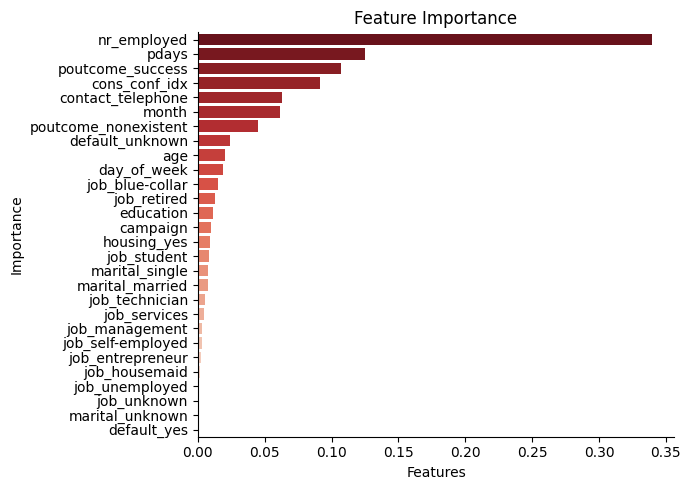

In [551]:
feature_importance_df = pd.DataFrame(best_et.feature_importances_, index = best_et.feature_names_in_, columns=['importance']).sort_values(by = 'importance', ascending=False)
fig, axis = plt.subplots(1, 1, figsize = (7, 5))
sns.despine(fig)
sns.barplot(
    data = feature_importance_df,
    y = feature_importance_df.index,
    x = 'importance',
    ax = axis,
    palette = 'Reds_r',
    hue = feature_importance_df.index
)
axis.set_title('Feature Importance')
axis.set_xlabel('Features')
axis.set_ylabel('Importance')
plt.tight_layout()
fig.savefig('feature_importance_et.jpg', dpi = 300)